## Data Preparation

In [1]:
import pandas as pd

Marriage, Fertility Rate, Live Birth

In [2]:
df_marriage_fr_birth=pd.read_csv('./Datasets/1_Marriage_FR_Birth.csv')

province_mapping= {
    'Jeonbuk': 'Jeollabuk-do'
}

df_marriage_fr_birth['Province'] = df_marriage_fr_birth['Province'].replace(province_mapping)

#df_marriage_fr_birth.to_csv('cleaned_marriage_fr_birth.csv')

columns_1=df_marriage_fr_birth['Province'].unique().tolist()

Housing Sales Price Index

In [3]:
df_house_price_index=pd.read_csv('./Datasets/2_House_Price_Index.csv')

province_mapping= {
    'Chungbuk': 'Chungcheongbuk-do',
    'Chungnam': 'Chungcheongnam-do',
    'Gyeongbuk': 'Gyeongsangbuk-do',
    'Gyeongnam': 'Gyeongsangnam-do',
    'Jeonbuk': 'Jeollabuk-do',
    'Jeonnam': 'Jeollanam-do',
    'Gangwon': 'Gangwon',
    'Gyeonggi': 'Gyeonggi-do',
    'Jeju': 'Jeju',
    'Seoul': 'Seoul',
    'Busan': 'Busan',
    'Daegu': 'Daegu'
}

df_house_price_index['Province'] = df_house_price_index['Province'].replace(province_mapping)

#df_house_price_index.to_csv('cleaned_house_price_index.csv')

columns_2=df_house_price_index['Province'].unique().tolist()


House Count

In [4]:
df_house_count=pd.read_csv('./Datasets/3_House_Count.csv')

#df_house_count.to_csv('cleaned_house_count.csv')

columns_3=df_house_count['Province'].unique().tolist()

Ownership Non-Ownership

In [5]:
df_ownership=pd.read_csv('./Datasets/4_Ownership_NonOwnership.csv')

#df_ownership.to_csv('cleaned_ownership.csv')

columns_4=df_ownership['Province'].unique().tolist()

House Count Gender Age

In [6]:
df_house_count_age=pd.read_csv('./Datasets/5_House_Count_Gender_Age.csv')

#df_house_count_age.to_csv('cleaned_house_count_age.csv')

columns_5=df_house_count_age['Province'].unique().tolist()

## Merging

In [7]:
df_merge_marriage_house_count=df_marriage_fr_birth.merge(df_house_count, on='Province')
df_merge_marriage_house_count

,Province,Year_x,Live Births,Fertility Rate,Crude birth rate(per 1000 population),Marriages,Crude marriage rate(per 1000 population),Year_y,Total number of houses,House owned by ordinary households,Total number of apartments,Apartments owned by ordinary households
0,Whole country,1990,649738,-,15.2,399312,9.3,2015,16367006,14151049,9806062,8194138
1,Whole country,1990,649738,-,15.2,399312,9.3,2016,16692230,14525716,10029644,8428543
2,Whole country,1990,649738,-,15.2,399312,9.3,2017,17122573,14973014,10375363,8702268
3,Whole country,1990,649738,-,15.2,399312,9.3,2018,17633327,15328268,10826044,9037375
4,Whole country,1990,649738,-,15.2,399312,9.3,2019,18126954,15701210,11287048,9384629
...,...,...,...,...,...,...,...,...,...,...,...,...
5017,Jeju,2024,3200,0.83,4.7,2744,4.1,2019,241788,206991,76495,57438
5018,Jeju,2024,3200,0.83,4.7,2744,4.1,2020,246451,210286,78136,58325
5019,Jeju,2024,3200,0.83,4.7,2744,4.1,2021,249629,214900,79366,60060
5020,Jeju,2024,3200,0.83,4.7,2744,4.1,2022,252863,218507,80045,61192


In [8]:
df_merge_marriage_house_count=df_marriage_fr_birth.merge(df_house_count, on=['Province', 'Year'])
#df_merge_marriage_house_count.to_csv('0_Marriage_House_ownership.csv')

In [9]:
df_merge_marriage_house_count['House Ownership Rate']=round(df_merge_marriage_house_count['House owned by ordinary households']/df_merge_marriage_house_count['Total number of houses']*100,2)
df_merge_marriage_house_count

,Province,Year,Live Births,Fertility Rate,Crude birth rate(per 1000 population),Marriages,Crude marriage rate(per 1000 population),Total number of houses,House owned by ordinary households,Total number of apartments,Apartments owned by ordinary households,House Ownership Rate
0,Whole country,2017,357771,1.052,7,264455,5.2,17122573,14973014,10375363,8702268,87.45
1,Whole country,2018,326822,0.977,6.4,257622,5,17633327,15328268,10826044,9037375,86.93
2,Whole country,2019,302676,0.918,5.9,239159,4.7,18126954,15701210,11287048,9384629,86.62
3,Whole country,2020,272337,0.837,5.3,213502,4.2,18525844,15982836,11661851,9655228,86.27
4,Whole country,2021,260562,0.808,5.1,192507,3.8,18811627,16257216,11948544,9932671,86.42
...,...,...,...,...,...,...,...,...,...,...,...,...
103,Jeju,2018,4781,1.22,7.3,3638,5.5,233068,200587,74199,55842,86.06
104,Jeju,2019,4500,1.145,6.8,3358,5.1,241788,206991,76495,57438,85.61
105,Jeju,2020,3989,1.021,6,2981,4.5,246451,210286,78136,58325,85.33
106,Jeju,2021,3728,0.951,5.6,2661,4,249629,214900,79366,60060,86.09


In [10]:
print(df_merge_marriage_house_count[['House Ownership Rate', 'Fertility Rate', 'Crude marriage rate(per 1000 population)']].dtypes)


House Ownership Rate                        float64
Fertility Rate                               object
Crude marriage rate(per 1000 population)     object
dtype: object


In [11]:
df_merge_marriage_house_count['House Ownership Rate'] = pd.to_numeric(
    df_merge_marriage_house_count['House Ownership Rate'], errors='coerce')

df_merge_marriage_house_count['Fertility Rate'] = pd.to_numeric(
    df_merge_marriage_house_count['Fertility Rate'], errors='coerce')

df_merge_marriage_house_count['Crude marriage rate(per 1000 population)'] = pd.to_numeric(
    df_merge_marriage_house_count['Crude marriage rate(per 1000 population)'], errors='coerce')

In [12]:
df_clean = df_merge_marriage_house_count.dropna(
    subset=['House Ownership Rate', 'Fertility Rate', 'Crude marriage rate(per 1000 population)'])

#df_clean.to_csv('./Merged Datasets/0_Marriage_House_ownership.csv')

# Does the lack of home ownership correlate with a number of marriages registered and childbirth in South Korea?"

Home Ownership Rate & Fertility Rate

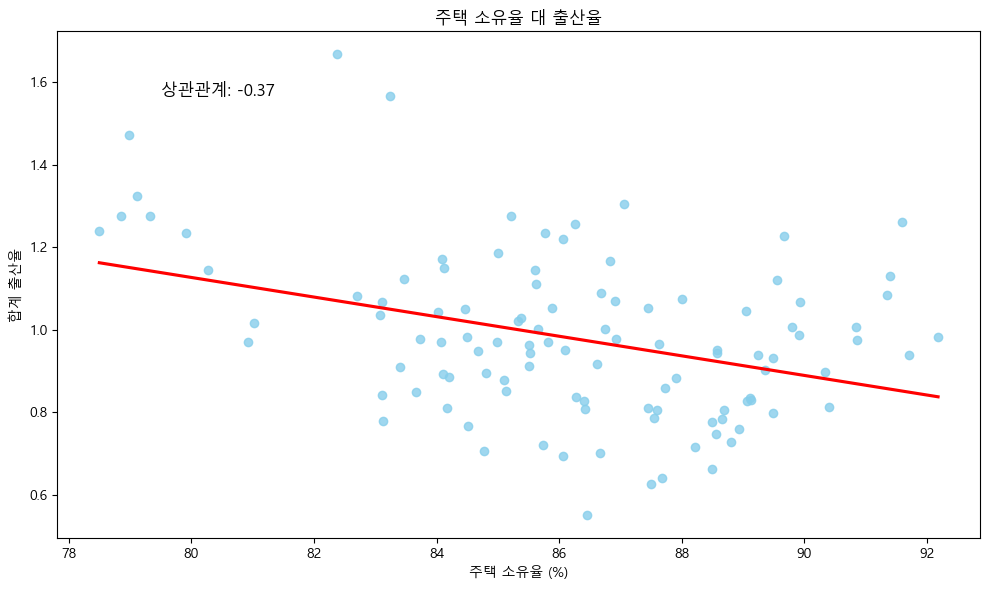

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib import font_manager

# Using font that supports Korean
rcParams['font.family'] = 'Malgun Gothic'  # or 'NanumGothic' or other installed Korean font
plt.rcParams['axes.unicode_minus'] = False  # To handle minus sign correctly

# Correlation
corr = df_clean['House Ownership Rate'].corr(df_clean['Fertility Rate'])

plt.figure(figsize=(10, 6))
sns.regplot(
    data=df_clean,
    x='House Ownership Rate',
    y='Fertility Rate',
    scatter_kws={'color': 'skyblue'},
    line_kws={'color': 'red'},
    ci=None
)

plt.text(
    x=df_clean['House Ownership Rate'].min() + 1,
    y=df_clean['Fertility Rate'].max() - 0.1,
    s=f'상관관계: {corr:.2f}',
    fontsize=12,
    color='black'
)

plt.title('주택 소유율 대 출산율') #Homeownership rate vs. birth rate
plt.xlabel('주택 소유율 (%)') #Home ownership rate
plt.ylabel('합계 출산율') #Fertility rate
plt.tight_layout()
plt.show()


📌 What does -0.37 mean in your case?
Direction: Negative → as home ownership increases, fertility tends to decrease.

Strength: Moderate → not weak (like -0.1), but not strong (like -0.7 either).

Interpretation: Housing may be one of several contributing factors, but not the sole or dominant one affecting fertility.

✅ Final Answer Summary for Question:

"Does the lack of home ownership correlate with a number of marriages registered and childbirth in South Korea?"

Based on the merged data and scatter plot analysis, there is a moderate negative correlation between home ownership rate and fertility rate across South Korean provinces (correlation coefficient = -0.37). The downward trend observed in the scatter plot suggests that higher rates of home ownership do not correspond to increased fertility. In fact, provinces with higher home ownership tend to have slightly lower fertility rates. This implies that housing availability alone is not a strong driver of fertility decisions, and broader social or economic factors are likely influencing these trends.

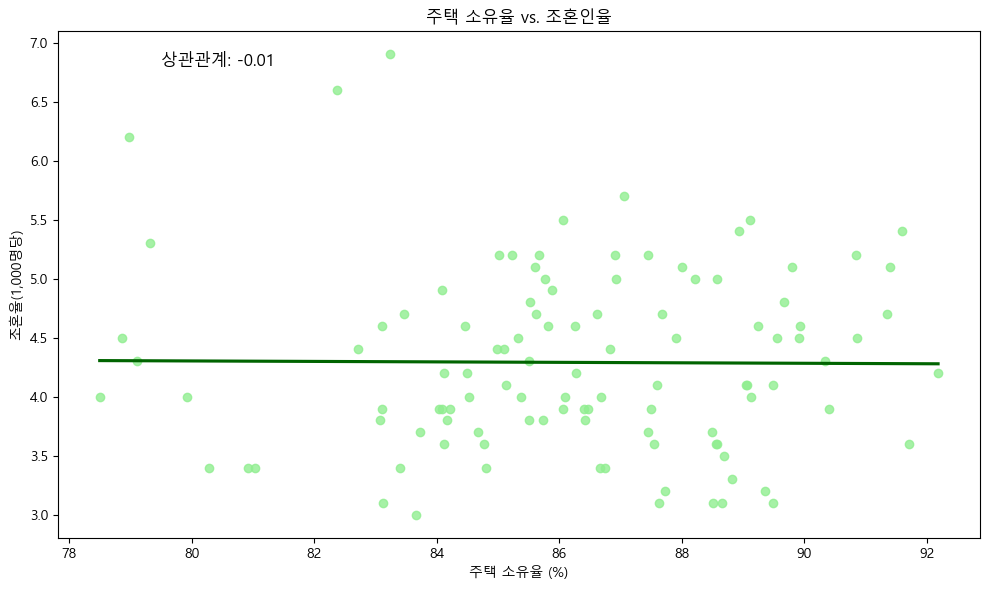

In [35]:
from matplotlib import rcParams
from matplotlib import font_manager

# Use a font that supports Korean
rcParams['font.family'] = 'Malgun Gothic'  # or 'NanumGothic' or other installed Korean font
plt.rcParams['axes.unicode_minus'] = False  # To handle minus sign correctly
# Correlation
corr_marriage_rate = df_clean['House Ownership Rate'].corr(df_clean['Crude marriage rate(per 1000 population)'])

# Plot
plt.figure(figsize=(10, 6))
sns.regplot(
    data=df_clean,
    x='House Ownership Rate',
    y='Crude marriage rate(per 1000 population)',
    scatter_kws={'color': 'lightgreen'},
    line_kws={'color': 'darkgreen'},
    ci=None
)

plt.text(
    x=df_clean['House Ownership Rate'].min() + 1,
    y=df_clean['Crude marriage rate(per 1000 population)'].max() - 0.1,
    s=f'상관관계: {corr_marriage_rate:.2f}',
    fontsize=12,
    color='black'
)

plt.title('주택 소유율 vs. 조혼인율')  #Home Ownership Rate vs Crude Marriage Rate
plt.xlabel('주택 소유율 (%)') #Home Ownership Rate
plt.ylabel('조혼율(1,000명당)') #Crude Marriage Rate (per 1,000 people)
plt.tight_layout()
plt.show()


A flat regression line,

A correlation coefficient of -0.01, which is close to 0.

👉 What this means:
There is no statistically significant linear relationship between the home ownership rate and the crude marriage rate. In simpler terms:

Higher or lower rates of home ownership do not appear to impact how often people get married (as measured by crude marriage rate).



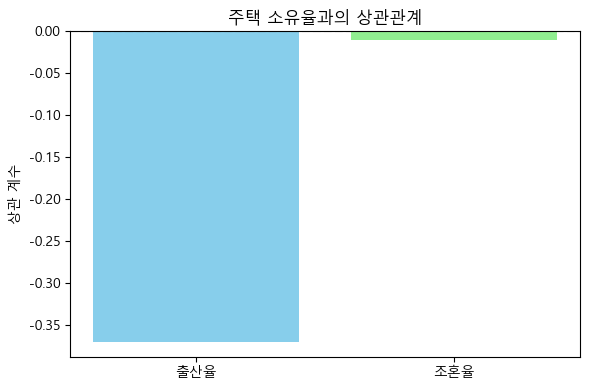

In [38]:
correlations = {
    '출산율': -0.37,
    '조혼율': -0.01
}

plt.figure(figsize=(6, 4))
plt.bar(correlations.keys(), correlations.values(), color=['skyblue', 'lightgreen'])
plt.title('주택 소유율과의 상관관계')
plt.ylabel('상관 계수')
plt.axhline(0, color='gray', linestyle='--')
plt.tight_layout()
plt.show()


Answer: To summarize, home ownership rate seems to be more related to fertility patterns than to marriage rates, and this is supported both visually and statistically. Therefore, home ownership may play a more influential role in fertility behavior than in marriage trends

# Do regions with lower housing‐price growth rates have higher local marriage and fertility rates?

In [16]:
df_house_price_index =df_house_price_index.sort_values(['Province', 'Year'])  

# Price growth rate for total index
df_house_price_index['Price Growth Rate (%)'] =round(df_house_price_index.groupby('Province')['Total'].pct_change() * 100,2)

# Apartment price growth rate
df_house_price_index['Apartment Growth Rate (%)'] =round(df_house_price_index.groupby('Province')['Apartments'].pct_change() * 100,2)

# Apartment price growth rate
df_house_price_index['Row House Growth Rate (%)'] =round(df_house_price_index.groupby('Province')['Row Houses'].pct_change() * 100,2)

# Apartment price growth rate
df_house_price_index['Detached House Growth Rate (%)'] =round(df_house_price_index.groupby('Province')['Detached Houses'].pct_change() * 100,2)

df_house_price_index


,Unnamed: 0,Province,Total,Apartments,Row Houses,Detached Houses,Year,Price Growth Rate (%),Apartment Growth Rate (%),Row House Growth Rate (%),Detached House Growth Rate (%)
0,1028,Busan,66.4,54.7,93.9,81.4,2003,NaN,NaN,NaN,NaN
1,1029,Busan,65.7,54.2,92.1,80.4,2003,-1.05,-0.91,-1.92,-1.23
2,1030,Busan,65.2,54.1,91.3,78.9,2004,-0.76,-0.18,-0.87,-1.87
3,1039,Busan,63.7,53.7,86.5,75.5,2004,-2.30,-0.74,-5.26,-4.31
4,1040,Busan,63.3,53.5,85.9,75.0,2004,-0.63,-0.37,-0.69,-0.66
...,...,...,...,...,...,...,...,...,...,...,...
4513,249,Whole country,96.1,93.3,98.0,104.0,2024,0.21,0.32,0.00,0.10
4514,250,Whole country,96.3,93.5,98.1,104.1,2024,0.21,0.21,0.10,0.10
4515,254,Whole country,96.2,93.4,98.0,104.4,2025,-0.10,-0.11,-0.10,0.29
4516,255,Whole country,96.2,93.3,98.0,104.5,2025,0.00,-0.11,0.00,0.10


In [17]:
df_house_price_index.loc[
    df_house_price_index['Province'] == 'Whole Country',
    'Province'
] = 'Whole country'


In [18]:
df_house_price_agg = df_house_price_index.groupby(['Province', 'Year']).agg({
    'Price Growth Rate (%)': 'mean',
    'Apartment Growth Rate (%)': 'mean',
    'Row House Growth Rate (%)': 'mean',
    'Detached House Growth Rate (%)': 'mean'
}).reset_index()

df_house_price_agg = df_house_price_agg.round({
    'Price Growth Rate (%)': 2,
    'Apartment Growth Rate (%)': 2,
    'Row House Growth Rate (%)': 2,
    'Detached House Growth Rate (%)': 2
})

In [19]:
df_merge_fr_price=df_marriage_fr_birth.merge(
    df_house_price_agg,
    on=['Province', 'Year']
)
df_merge_fr_price


,Province,Year,Live Births,Fertility Rate,Crude birth rate(per 1000 population),Marriages,Crude marriage rate(per 1000 population),Price Growth Rate (%),Apartment Growth Rate (%),Row House Growth Rate (%),Detached House Growth Rate (%)
0,Whole country,2003,495036,1.191,10.2,302503,6.3,-0.81,-0.54,-1.29,-1.23
1,Whole country,2004,476958,1.164,9.8,308598,6.4,-0.11,0.03,-0.31,-0.30
2,Whole country,2005,438707,1.085,9,314304,6.5,0.20,0.38,-0.10,-0.10
3,Whole country,2006,451759,1.132,9.2,330634,6.8,0.47,0.58,0.44,0.04
4,Whole country,2007,496822,1.259,10.1,343559,7,0.90,0.94,1.36,0.26
...,...,...,...,...,...,...,...,...,...,...,...
311,Jeju,2019,4500,1.145,6.8,3358,5.1,-0.07,-0.24,-0.22,0.12
312,Jeju,2020,3989,1.021,6,2981,4.5,-0.29,-0.27,-0.29,-0.30
313,Jeju,2021,3728,0.951,5.6,2661,4,0.44,1.38,0.10,0.09
314,Jeju,2023,3222,0.827,4.8,2614,3.9,-0.25,-0.55,-0.19,-0.05


In [20]:
# Remove % sign if present and convert to float
df_merge_fr_price['Price Growth Rate (%)'] = (
    df_merge_fr_price['Price Growth Rate (%)']
    .astype(str)  # ensure it's string to replace
    .str.replace('%', '', regex=False)
    .str.strip()
    .replace('', 'NaN')  # empty strings to NaN
    .astype(float)
)

# Similarly for Fertility Rate
df_merge_fr_price['Fertility Rate'] = pd.to_numeric(
    df_merge_fr_price['Fertility Rate'], errors='coerce'
)

# Drop rows where either is NaN
df_merge_fr_price_clean = df_merge_fr_price.dropna(subset=['Price Growth Rate (%)', 'Fertility Rate'])


In [21]:
print(df_merge_fr_price_clean[['Price Growth Rate (%)', 'Fertility Rate']].dtypes)
print(df_merge_fr_price_clean[['Price Growth Rate (%)', 'Fertility Rate']].head())


Price Growth Rate (%)    float64
Fertility Rate           float64
dtype: object
   Price Growth Rate (%)  Fertility Rate
0                  -0.81           1.191
1                  -0.11           1.164
2                   0.20           1.085
3                   0.47           1.132
4                   0.90           1.259


## House Price Index vs. Fertility Rate

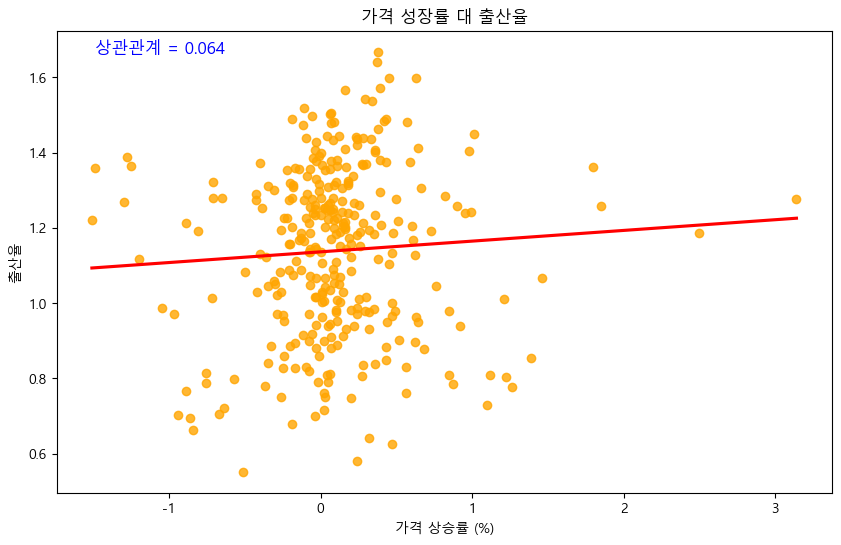

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt

# Correlation
corr = df_merge_fr_price_clean['Price Growth Rate (%)'].corr(df_merge_fr_price_clean['Fertility Rate'])

plt.figure(figsize=(10, 6))
sns.regplot(
    data=df_merge_fr_price_clean,
    x='Price Growth Rate (%)',
    y='Fertility Rate',
    scatter_kws={'color': 'orange'},
    line_kws={'color': 'red'},
    ci=None
)

plt.title('가격 성장률 대 출산율')  #Price Growth Rate vs Fertility Rate
plt.xlabel('가격 상승률 (%)') #Price Growth Rate
plt.ylabel('출산율') #Fertility Rate

plt.text(
    0.05, 0.95, 
    f'상관관계 = {corr:.3f}', 
    transform=plt.gca().transAxes, 
    fontsize=12, 
    color='blue'
)

plt.show()


In [23]:
# Convert columns to numeric, coerce errors to NaN
df_merge_fr_price['Price Growth Rate (%)'] = pd.to_numeric(df_merge_fr_price['Price Growth Rate (%)'], errors='coerce')
df_merge_fr_price['Crude marriage rate(per 1000 population)'] = pd.to_numeric(df_merge_fr_price['Crude marriage rate(per 1000 population)'], errors='coerce')

# Drop rows with NaN values in these columns
df_merge_fr_price_clean = df_merge_fr_price.dropna(subset=['Price Growth Rate (%)', 'Crude marriage rate(per 1000 population)'])
#df_merge_fr_price_clean.to_csv('0_Marriage_House_Price.csv')


## House Price Index vs. Crude Marriage Rate

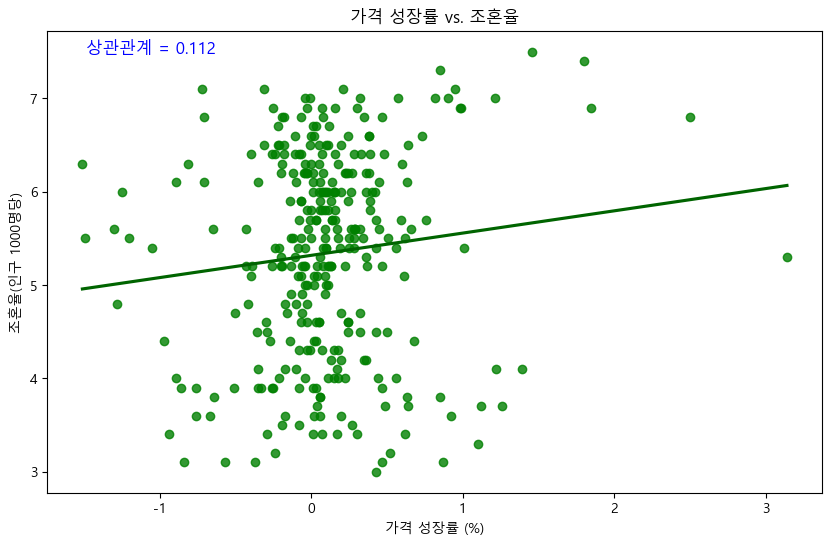

In [40]:
plt.figure(figsize=(10, 6))

#Correlation
corr = df_merge_fr_price_clean['Price Growth Rate (%)'].corr(df_merge_fr_price_clean['Crude marriage rate(per 1000 population)'])

sns.regplot(
    data=df_merge_fr_price_clean,
    x='Price Growth Rate (%)',
    y='Crude marriage rate(per 1000 population)',
    scatter_kws={'color': 'green'},
    line_kws={'color': 'darkgreen'},
    ci=None
)

plt.text(
    0.05, 0.95,
    f'상관관계 = {corr:.3f}',
    transform=plt.gca().transAxes,
    fontsize=12,
    color='blue'
)

plt.title('가격 성장률 vs. 조혼율') #Price Growth Rate vs Crude Marriage Rate
plt.xlabel('가격 성장률 (%)')  #Price Growth Rate
plt.ylabel('조혼율(인구 1000명당)') #Crude Marriage Rate (per 1000 population)
plt.show()


## Statistical Analysis

In [25]:
from scipy.stats import pearsonr

# Compute correlation and p-value for Fertility Rate
corr_fertility, pval_fertility = pearsonr(
    df_merge_fr_price_clean['Price Growth Rate (%)'],
    df_merge_fr_price_clean['Fertility Rate']
)

print(f"Fertility correlation: {corr_fertility:.3f}, p-value: {pval_fertility:.4f}")

# Compute correlation and p-value for Crude Marriage Rate
corr_marriage, pval_marriage = pearsonr(
    df_merge_fr_price_clean['Price Growth Rate (%)'],
    df_merge_fr_price_clean['Crude marriage rate(per 1000 population)']
)

print(f"Marriage correlation: {corr_marriage:.3f}, p-value: {pval_marriage:.4f}")


Fertility correlation: 0.064, p-value: 0.2574
Marriage correlation: 0.112, p-value: 0.0476


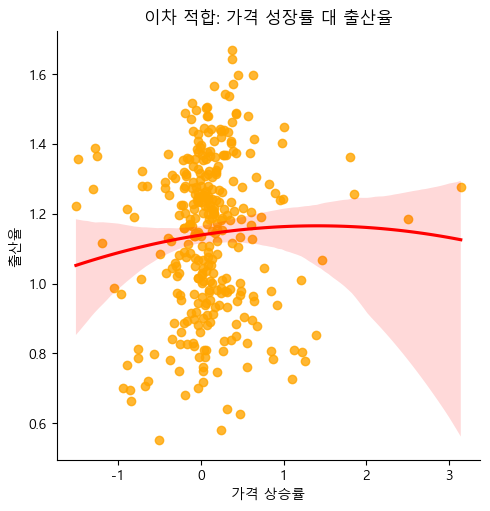

In [42]:
import numpy as np
import seaborn as sns

# Fit 2nd degree polynomial
sns.lmplot(
    data=df_merge_fr_price_clean,
    x='Price Growth Rate (%)',
    y='Fertility Rate',
    order=2,  # quadratic fit
    scatter_kws={'color': 'orange'},
    line_kws={'color': 'red'}
)
plt.title("이차 적합: 가격 성장률 대 출산율")  #Quadratic Fit: Price Growth Rate vs Fertility Rate
plt.xlabel('가격 상승률') #Price Growth Rate
plt.ylabel('출산율') #Fertility Rate
plt.show()


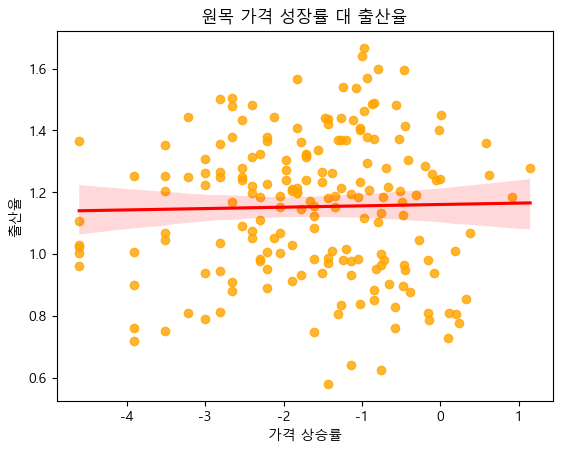

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure positive values before log
df = df_merge_fr_price_clean[df_merge_fr_price_clean['Price Growth Rate (%)'] > 0]

sns.regplot(
    data=df,
    x=np.log(df['Price Growth Rate (%)']),
    y=df['Fertility Rate'],
    scatter_kws={'color': 'orange'},
    line_kws={'color': 'red'}
)
plt.title("원목 가격 성장률 대 출산율")
plt.xlabel('가격 상승률') #Price Growth Rate
plt.ylabel('출산율') #Fertility Rate
plt.show()


In [28]:
# Sort data first
df_merge_fr_price_clean = df_merge_fr_price_clean.sort_values(['Province', 'Year'])

# Create lagged price growth (e.g., previous year)
df_merge_fr_price_clean['Price Growth Rate Lag1'] = df_merge_fr_price_clean.groupby('Province')['Price Growth Rate (%)'].shift(1)

# Drop rows with NaN lag
df_lagged = df_merge_fr_price_clean.dropna(subset=['Price Growth Rate Lag1'])

# Compute correlation
corr_lag, pval_lag = pearsonr(
    df_lagged['Price Growth Rate Lag1'],
    df_lagged['Fertility Rate']
)
print(f"Lagged correlation: {corr_lag:.3f}, p-value: {pval_lag:.4f}")


Lagged correlation: 0.018, p-value: 0.7617
